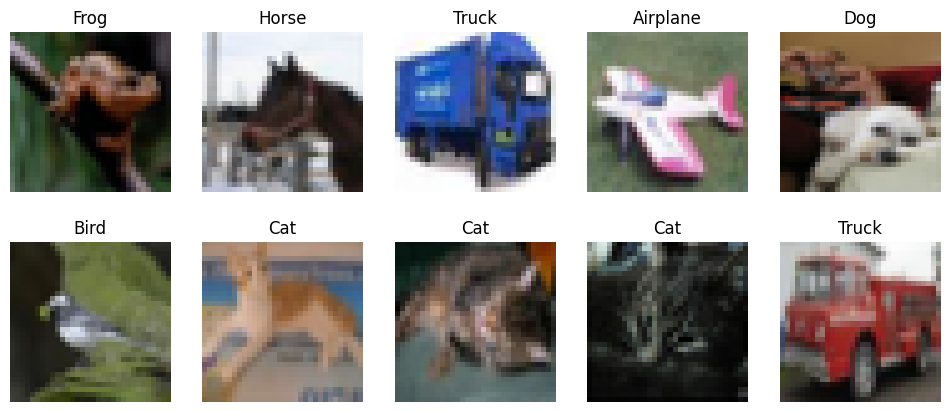


Training with: {'layers': 4, 'units': 128, 'activation_fn': 'relu', 'opt_choice': 'adam', 'learning_rate': 0.002, 'init_method': 'glorot_normal'}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.2550 - loss: 2.0200 - val_accuracy: 0.3728 - val_loss: 1.7307
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3696 - loss: 1.7436 - val_accuracy: 0.4056 - val_loss: 1.6521
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4027 - loss: 1.6535 - val_accuracy: 0.4118 - val_loss: 1.6299
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4201 - loss: 1.6161 - val_accuracy: 0.4154 - val_loss: 1.6325
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4313 - loss: 1.5782 - val_accuracy: 0.4248 - val_loss: 1.6239
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4338 - loss: 1.5685 - val_accuracy: 0.3952 - val_loss: 1.6815
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4488 - loss: 1.5349 - val_accuracy: 0.4468 - val_loss: 1.5497
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4611 - loss: 1.5094 - val_accuracy:

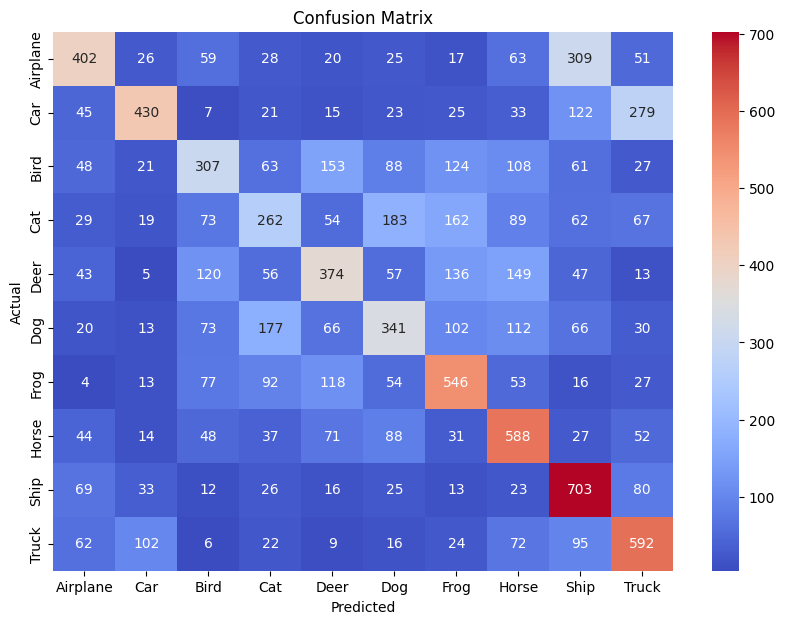


Cross Entropy Accuracy: 0.4545, Mean Squared Error Accuracy: 0.4545

### Recommended Configurations for MNIST ###
Suggested Config: {'layers': 5, 'units': 256, 'activation_fn': 'relu', 'opt_choice': 'adam', 'learning_rate': 0.0015}
Suggested Config: {'layers': 4, 'units': 128, 'activation_fn': 'relu', 'opt_choice': 'sgd', 'learning_rate': 0.002}
Suggested Config: {'layers': 3, 'units': 64, 'activation_fn': 'sigmoid', 'opt_choice': 'nesterov', 'learning_rate': 0.0009}


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Nadam
from sklearn.metrics import confusion_matrix

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# Normalize pixel values to the range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reserve 10% of training data for validation
val_size = int(0.1 * len(train_images))
val_images, val_labels = train_images[:val_size], train_labels[:val_size]
train_images, train_labels = train_images[val_size:], train_labels[val_size:]

# Convert class labels to one-hot encoding
train_labels = keras.utils.to_categorical(train_labels, 10)
val_labels = keras.utils.to_categorical(val_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

# CIFAR-10 class names
categories = ['Airplane', 'Car', 'Bird', 'Cat', 'Deer',
              'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Function to display sample images
def visualize_samples():
    fig, axes = plt.subplots(2, 5, figsize=(12, 5))
    for i in range(10):
        row, col = divmod(i, 5)
        axes[row, col].imshow(train_images[i])
        axes[row, col].set_title(categories[np.argmax(train_labels[i])])
        axes[row, col].axis('off')
    plt.show()

visualize_samples()

# Function to build a flexible neural network model
def build_network(layers=3, units=128, activation_fn='relu', init_method='he_uniform'):
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))  # Flatten input image

    # Adding hidden layers
    for _ in range(layers):
        model.add(Dense(units, activation=activation_fn, kernel_initializer=init_method))

    model.add(Dense(10, activation='softmax'))  # Output layer
    return model

# Function to train and evaluate the model
def train_model(layers, units, activation_fn, opt_choice, learning_rate, init_method, num_epochs=10, batch_size=64):
    model = build_network(layers, units, activation_fn, init_method)

    optimizers = {
        "sgd": SGD(learning_rate=learning_rate),
        "momentum": SGD(learning_rate=learning_rate, momentum=0.85),
        "nesterov": SGD(learning_rate=learning_rate, momentum=0.85, nesterov=True),
        "rmsprop": RMSprop(learning_rate=learning_rate),
        "adam": Adam(learning_rate=learning_rate),
        "nadam": Nadam(learning_rate=learning_rate)
    }

    model.compile(optimizer=optimizers[opt_choice], loss="categorical_crossentropy", metrics=['accuracy'])

    # Train model
    history = model.fit(train_images, train_labels, validation_data=(val_images, val_labels),
                        epochs=num_epochs, batch_size=batch_size, verbose=1)

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

    return model, test_acc, history

# Define different hyperparameter configurations
configs = [
    {"layers": 4, "units": 128, "activation_fn": "relu", "opt_choice": "adam", "learning_rate": 2e-3, "init_method": "glorot_normal"},
    {"layers": 3, "units": 64, "activation_fn": "relu", "opt_choice": "sgd", "learning_rate": 5e-3, "init_method": "random_uniform"},
    {"layers": 5, "units": 128, "activation_fn": "sigmoid", "opt_choice": "nesterov", "learning_rate": 8e-4, "init_method": "he_normal"}
]

best_net = None
highest_acc = 0
eval_results = []

# Train models with different configurations
for cfg in configs:
    print(f"\nTraining with: {cfg}")
    model, test_acc, history = train_model(**cfg)

    # Store best-performing model
    if test_acc > highest_acc:
        highest_acc = test_acc
        best_net = model

    eval_results.append((cfg, test_acc))

# Display test accuracy results
for cfg, acc in eval_results:
    print(f"Config: {cfg} -> Test Accuracy: {acc:.4f}")

print(f"\nBest Model Test Accuracy: {highest_acc:.4f}")

# Generate and plot confusion matrix for the best model
y_preds = np.argmax(best_net.predict(test_images), axis=1)
y_actual = np.argmax(test_labels, axis=1)
conf_matrix = confusion_matrix(y_actual, y_preds)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Compare Cross Entropy Loss with Mean Squared Error Loss
best_net.compile(optimizer="adam", loss="mean_squared_error", metrics=['accuracy'])
mse_loss, mse_acc = best_net.evaluate(test_images, test_labels, verbose=0)
print(f"\nCross Entropy Accuracy: {highest_acc:.4f}, Mean Squared Error Accuracy: {mse_acc:.4f}")

# Recommendations for the MNIST dataset
print("\n### Recommended Configurations for MNIST ###")
mnist_suggestions = [
    {"layers": 5, "units": 256, "activation_fn": "relu", "opt_choice": "adam", "learning_rate": 1.5e-3},
    {"layers": 4, "units": 128, "activation_fn": "relu", "opt_choice": "sgd", "learning_rate": 2e-3},
    {"layers": 3, "units": 64, "activation_fn": "sigmoid", "opt_choice": "nesterov", "learning_rate": 9e-4}
]

for suggestion in mnist_suggestions:
    print(f"Suggested Config: {suggestion}")
